In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv(r'/content/houserent.csv')
df.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-05-2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-05-2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04-07-2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09-05-2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [14]:
df.columns


Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

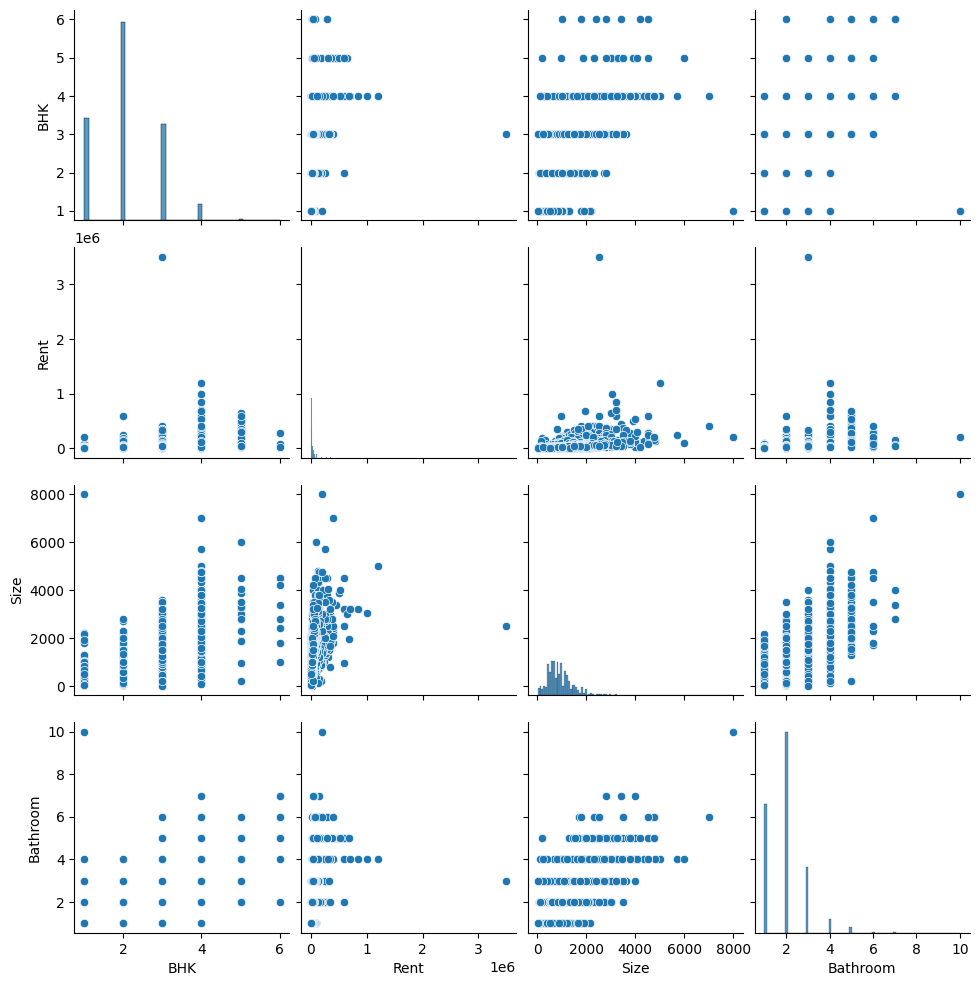

In [15]:
sns.pairplot(df)


In [16]:
data1=df.dropna()
data1


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-05-2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-05-2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04-07-2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09-05-2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,18-05-2022,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,15-05-2022,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,10-07-2022,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,06-07-2022,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


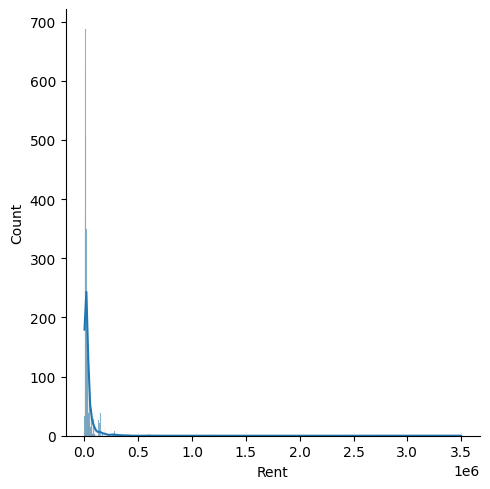

In [17]:
sns.displot(data1['Rent'],kde=True)


In [18]:
df.corr(numeric_only=True)


,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


<Axes: >

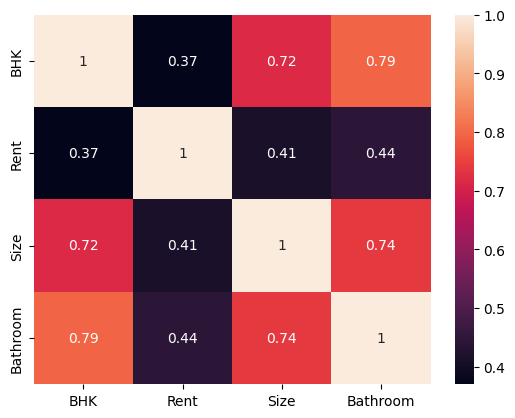

In [19]:
sns.heatmap(df.corr(numeric_only=True),annot=True)


In [20]:
x=data1[['BHK','Size','Bathroom']]
y=data1['Rent']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state
=101)
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)


LinearRegression()

In [21]:
print(lm.intercept_)


-37932.943080091885


In [24]:
lm.coef_


array([-3681.90013097,    28.88010858, 26771.24455739])

In [25]:
x_train.columns


Index(['BHK', 'Size', 'Bathroom'], dtype='object')

In [26]:
cdf=pd.DataFrame(lm.coef_,x.columns,columns=['Coeff'])


In [27]:
predictions=lm.predict(x_test)
predictions


array([76099.25849266, 31349.83263391, 25862.61200438, ...,
       31061.03154814, 42901.87606448, 30194.62829085])

In [28]:
y_test


4501    37000
480     10000
558     68000
1381    32000
4744    45000
        ...  
3896    10000
130      4500
3032    10000
4707    25000
1481    70000
Name: Rent, Length: 1899, dtype: int64

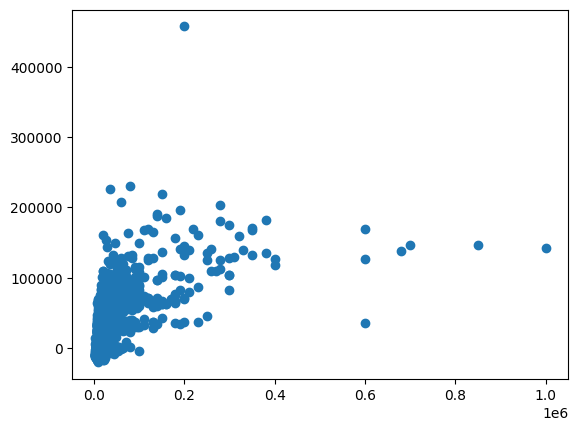

In [29]:
plt.scatter(y_test,predictions)


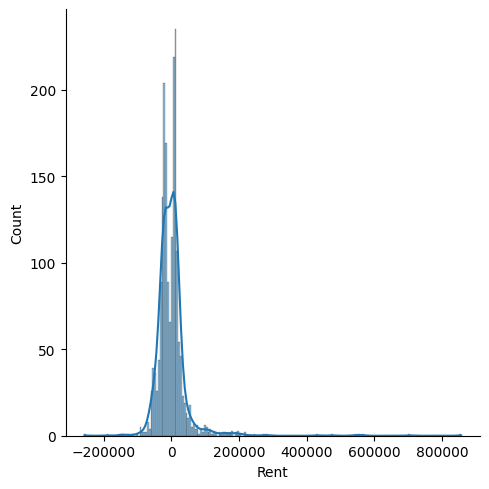

In [30]:
sns.displot((y_test-predictions),kde=True)

In [31]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))



MAE:  26897.285518576442
MSE:  2756920012.027936
RMSE:  52506.38067918923


In [32]:
input_data=(1,1000,2)
input_data_numpy=np.asarray(input_data)
input_data_reshaped=input_data_numpy.reshape(1,-1)
prediction=lm.predict(input_data_reshaped)
print("Predicted price:",prediction[0])

Predicted price: 40807.754480162905


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
